<a href="https://colab.research.google.com/github/Chaitya0623/Healo/blob/main/Healo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd

In [28]:
import json
# to load the json file and create it into a dataframe
with open(r'/content/drive/MyDrive/ML_Projects/Infiheal/intents.json') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])

In [29]:
# To split all the patterns
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the 'wordnet' and 'stopwords' resources from NLTK
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Create a lemmatizer object and define the list of stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to lemmatize and remove stopwords from a sentence
def process_sentence(sentence):
    # Tokenize the sentence into words
    words = nltk.word_tokenize(sentence)
    # Lemmatize each word that is not a stopword and join them back into a sentence
    processed_sentence = ' '.join([lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words])
    return processed_sentence

df['pattern'] = ''
for i in range(0,len(df)):
  df['pattern'][i] = process_sentence(df['patterns'][i])
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tag,patterns,responses,pattern
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...,Hi
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...,Hey
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...,anyone ?
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...,Hi
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...,Hello
...,...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha...",know 'm unwell ?
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d...",maintain social connection ? feel lonely ?
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...,'s difference anxiety stress ?
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap...",'s difference sadness depression ?


In [31]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
number of unique words =  303
X shape =  (232, 18)
y shape =  (232,)
num of classes =  80


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 18, 100)           30400     
                                                                 
 lstm_6 (LSTM)               (None, 18, 32)            17024     
                                                                 
 layer_normalization_10 (Lay  (None, 18, 32)           64        
 erNormalization)                                                
                                                                 
 lstm_7 (LSTM)               (None, 18, 32)            8320      
                                                                 
 layer_normalization_11 (Lay  (None, 18, 32)           64        
 erNormalization)                                                
                                                                 
 lstm_8 (LSTM)               (None, 32)               

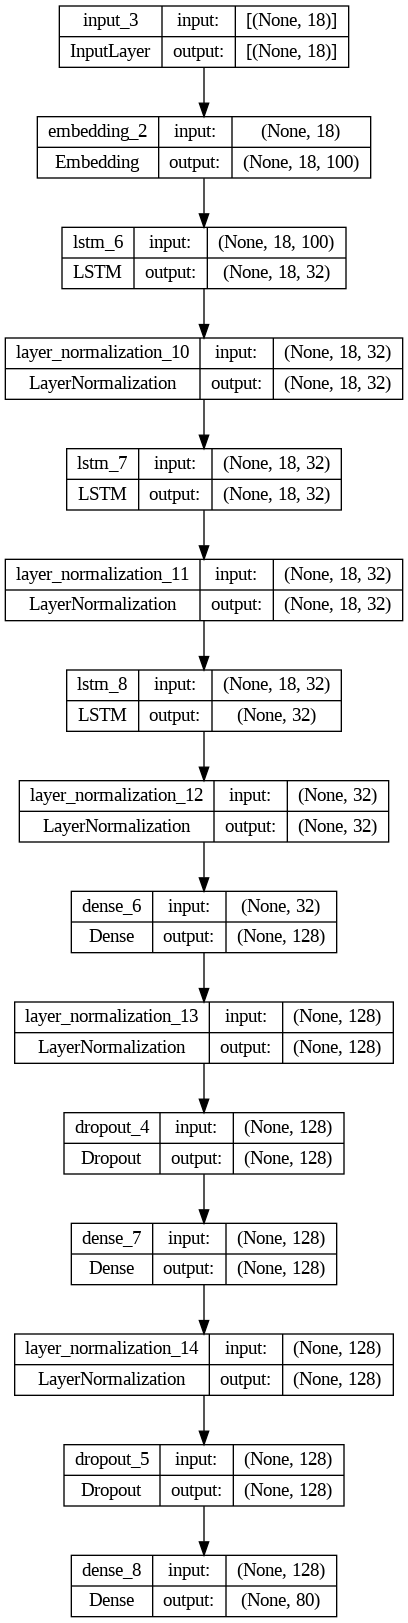

In [32]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Input(shape=(X.shape[1])))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [33]:
import re
import random

def model_response(query): 
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', query)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)
        
    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    print("Chatbot: {}".format(random.choice(responses)))

In [34]:
model_response('I am feeling low today')

1/1 [==============================] - 5s 5s/step
Chatbot: That's a great name. Tell me more about yourself.


In [36]:
!pip install transformers
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load pre-trained BERT model and tokenizer
model1 = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer1 = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function for predicting sentiment of text
def predict_sentiment(text):
    # Tokenize text and convert to input ids and attention mask
    inputs = tokenizer1(text, return_tensors='pt')
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    
    # Predict sentiment using BERT model
    with torch.no_grad():
        logits = model1(input_ids, attention_mask=attention_mask)[0]
    probs = torch.softmax(logits, dim=1).tolist()[0]
    
    # Determine sentiment label based on highest probability
    sentiment = 'Positive' if probs[1] > probs[0] else 'Negative'
    
    return sentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [40]:
# Define the main loop
print('Chatbot: Welcome to Infiheal. What problem are you facing?')
count = 0

while True:
    # Get user input
    message = input("You: ")
    sentiment = predict_sentiment(message)
    print('Sentiment: '+sentiment)
    if sentiment=='negative':
      count+=1
    if message=='quit':
      if count>5:
        print('High Risk: You will be contacted to the nearest distress helpline soon')
      elif count>3:
        print('Moderate Risk: We recommend you connecting our therapist at +91 00000 0000')
      else:
        print('Low Risk: Team Infiheal wishes you good health, stay healthy')
      break

    # Generate a response
    try:
      model_response(message)
    except:
      print('An Exception Occured')

Chatbot: Welcome to Infiheal. What problem are you facing?
You: hello
Sentiment: Positive
An Exception Occured
You: I can't sleep
Sentiment: Negative
1/1 [==============================] - 0s 138ms/step
Chatbot: Oh sorry I didn't realise that. I'll try not to repeat myself again.
You: i feel lonely
Sentiment: Negative
1/1 [==============================] - 0s 29ms/step
Chatbot: I'm trying my best to help you. So please talk to me
You: my dad passed away
Sentiment: Negative
1/1 [==============================] - 0s 47ms/step
Chatbot: That seem awful. What do you think is behind this?
You: I feel low
Sentiment: Negative
1/1 [==============================] - 0s 28ms/step
Chatbot: I'm very sorry to hear that but you have so much to look forward to. Please seek help by contacting: 9152987821.
You: what is mental health?
Sentiment: Positive
1/1 [==============================] - 0s 39ms/step
Chatbot: Next, I would suggest you to practice meditation. Meditation can produce a deep state of re

In [26]:
# LLM's (Large Language Models) can also be used by processing large amounts of data using statistical techniques to learn patterns and relationships between words,
# phrases, and sentences. They are based on neural networks and are trained using supervised learning. A large amount of data is required to train the model.
#  Once the model is trained, it can be used to predict the likelihood of the next word based on the preceding words. There are several chatbot building platforms 
# that incorporate LLM technology, such as Dialogflow, Botpress, and Rasa (just import the api's). LangChain is a framework built around LLM's.